# Problem 2

In [4]:
%pylab inline

import numpy as np
from scipy import stats
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [41]:
def PCA(data, dims, standarize=True):
    if standarize:
        data = (data - np.mean(data, 0))/np.std(data, 0)
    S = np.cov(data.T)
    D, V = np.linalg.eig(S)
    idx = D.argsort()[::-1]
    D, V = D[idx], V[:, idx]
    decorrelated_data = data.dot(V)/sqrt(D) if standarize else data.dot(V)
    return decorrelated_data[:, :dims], D, V

In [3]:
def kNN(k, test_point, training_points, training_labels):
    distances = ((training_points - test_point)**2).sum(axis=1)
    indices = argsort(distances)
    return stats.mode(array([training_labels[index] for index in indices[:k]]))[0][0]

### Iris

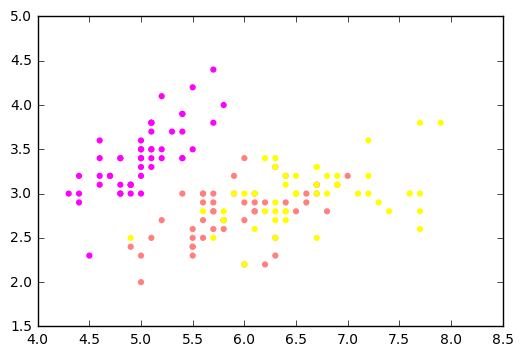

In [6]:
iris = datasets.load_iris()
scatter(iris.data[:, 0], iris.data[:, 1], edgecolors='none', c=iris.target, cmap='spring')

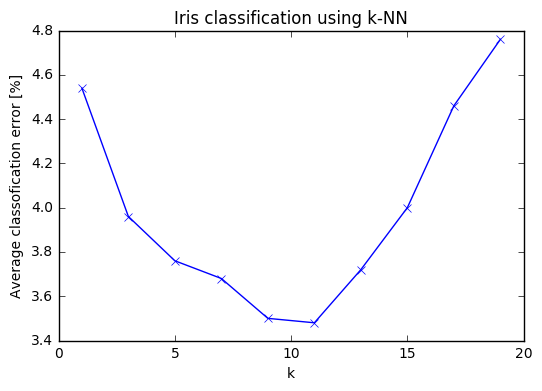

In [56]:
iris_set = column_stack((iris.data, iris.target))

errors = array([0]*10)
training_size, test_size = 100, 50
tries = 100
for i in range(tries):
    random.shuffle(iris_set)
    training_set, test_set = iris_set[:training_size], iris_set[training_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classofication error [%]')
title('Iris classification using k-NN')

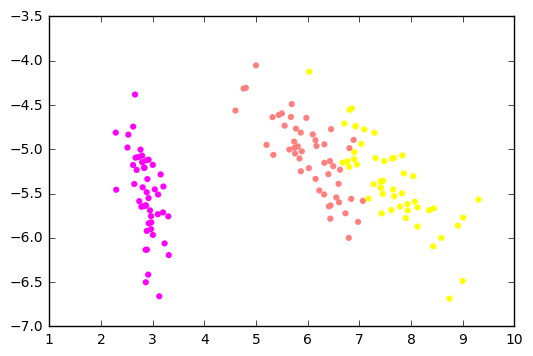

In [47]:
reduced_iris, D, V = PCA(iris.data, 2, standarize=False)
scatter(reduced_iris[:, 0], reduced_iris[:, 1], edgecolors='none', c=iris.target, cmap='spring')

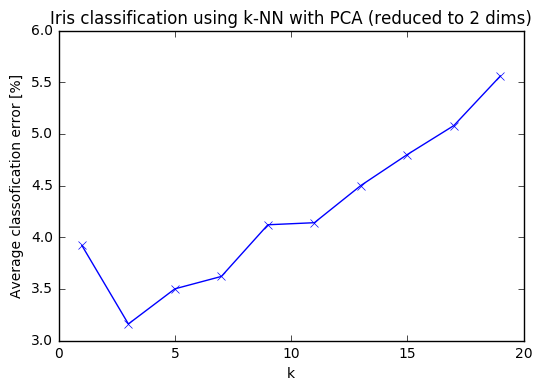

In [207]:
iris_set = column_stack((iris.data, iris.target))
dims = 2

errors = array([0]*10)
training_size, test_size = 100, 50
tries = 100
for i in range(tries):
    random.shuffle(iris_set)
    training_set, test_set = iris_set[:training_size], iris_set[training_size:]
    training_labels, test_labels = training_set[:, -1], test_set[:, -1]
    reduced_training_set, D, V = PCA(training_set[:, :-1], dims, standarize=False)
    reduced_test_set = (test_set[:, :-1].dot(V))[:, :dims]
    for k in range(1,20,2):
        for (test_data, test_label) in zip(reduced_test_set, test_labels):
            label = kNN(k, test_data, reduced_training_set, training_labels)
            if label != test_label:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classofication error [%]')
title('Iris classification using k-NN with PCA (reduced to {} dims)'.format(dims))

### Wine

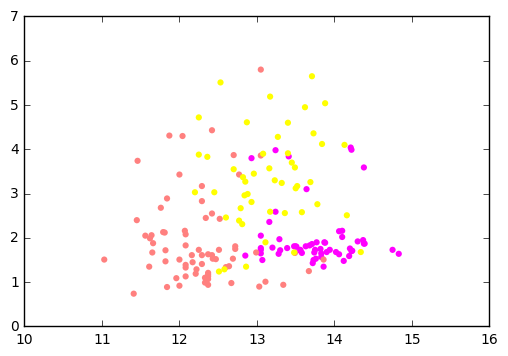

In [88]:
wine = genfromtxt("Lista07Dane/wine.data.txt", delimiter=',')
scatter(wine[:, 1], wine[:, 2], edgecolors='none', c=wine[:, 0], cmap='spring')

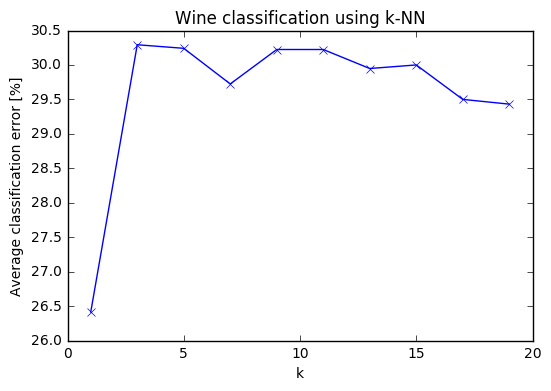

In [90]:
errors = array([0]*10)
training_size, test_size = 120, 58
tries = 100
for i in range(tries):
    random.shuffle(wine)
    training_set, test_set = wine[:training_size], wine[training_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[1:], training_set[:, 1:], training_set[:, 0])
            if label != test_data[0]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Wine classification using k-NN')

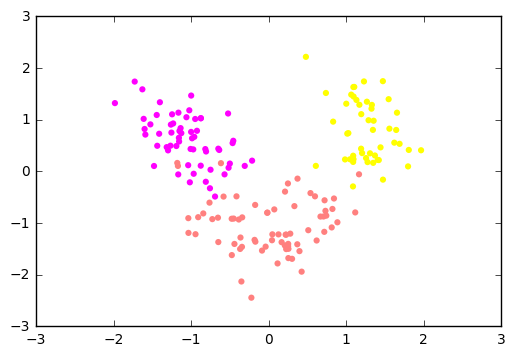

In [119]:
reduced_wine, D, V = PCA(wine[:, 1:], 6, standarize=True)
scatter(reduced_wine[:, 0], reduced_wine[:, 1], edgecolors='none', c=wine[:, 0], cmap='spring')

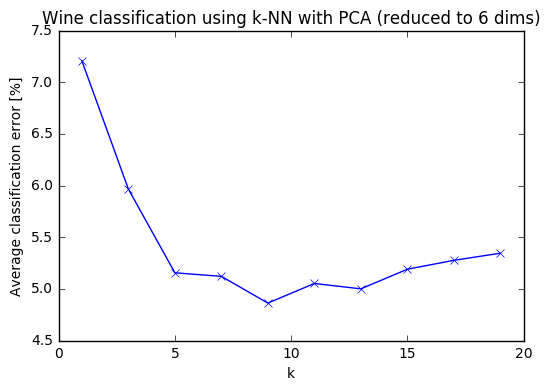

In [137]:
wine_set = column_stack((wine[:, 1:], wine[:, 0]))
dims = 6

errors = array([0]*10)
training_size, test_size = 120, 58
tries = 100
for i in range(tries):
    random.shuffle(wine_set)
    training_set, test_set = wine_set[:training_size], wine_set[training_size:]
    training_labels, test_labels = training_set[:, -1], test_set[:, -1]
    reduced_training_set, D, V = PCA(training_set[:, :-1], dims, standarize=True)
    standarized_test_set = (test_set - np.mean(test_set, 0))/np.std(test_set, 0)
    reduced_test_set = (standarized_test_set[:, :-1].dot(V)/sqrt(D))[:, :dims]
    for k in range(1,20,2):
        for (test_data, test_label) in zip(reduced_test_set, test_labels):
            label = kNN(k, test_data, reduced_training_set, training_labels)
            if label != test_label:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Wine classification using k-NN with PCA (reduced to {} dims)'.format(dims))

### Parkinsons

(195L, 22L)


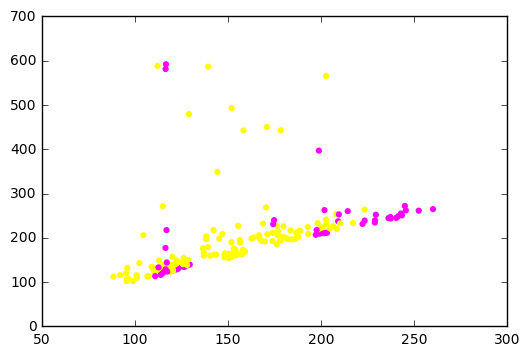

In [105]:
parkinsons_data = (genfromtxt("Lista07Dane/parkinsons.data.txt", delimiter=',')[1:])[:, 1:]
parkinsons, labels = parkinsons_data[:, [x for x in range(parkinsons_data.shape[1]) if x != 16]], parkinsons_data[:, 16]
scatter(parkinsons[:, 0], parkinsons[:, 1], edgecolors='none', c=labels, cmap='spring')

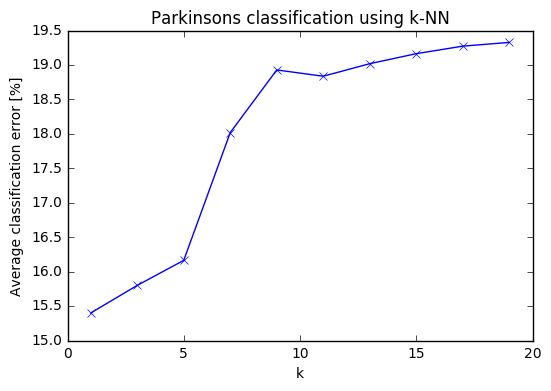

In [106]:
set_ = column_stack((parkinsons, labels))

errors = array([0]*10)
training_size, test_size = 140, 55
tries = 100
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Parkinsons classification using k-NN')

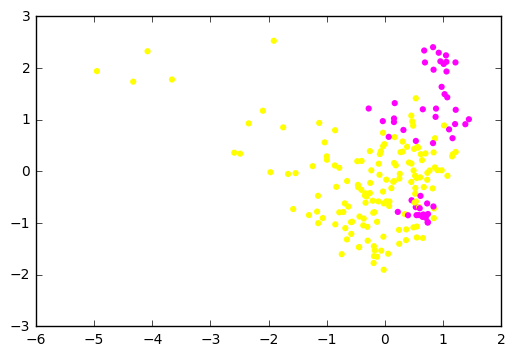

In [122]:
reduced_parkinsons, D, V = PCA(parkinsons, 5, standarize=True)
scatter(reduced_parkinsons[:, 0], reduced_parkinsons[:, 1], edgecolors='none', c=labels, cmap='spring')

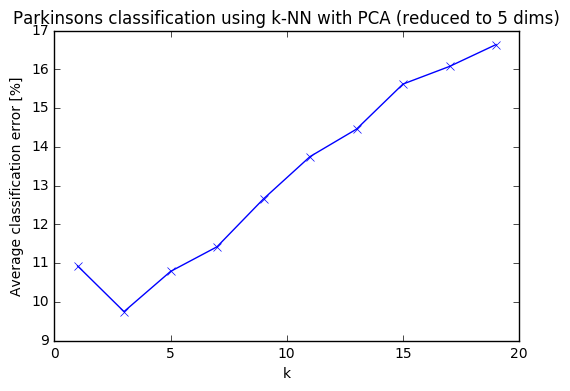

In [148]:
set_ = column_stack((parkinsons, labels))
dims = 5

errors = array([0]*10)
training_size, test_size = 140, 55
tries = 100
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    training_labels, test_labels = training_set[:, -1], test_set[:, -1]
    reduced_training_set, D, V = PCA(training_set[:, :-1], dims, standarize=True)
    standarized_test_set = (test_set - np.mean(test_set, 0))/np.std(test_set, 0)
    reduced_test_set = (standarized_test_set[:, :-1].dot(V)/sqrt(D))[:, :dims]
    for k in range(1,20,2):
        for (test_data, test_label) in zip(reduced_test_set, test_labels):
            label = kNN(k, test_data, reduced_training_set, training_labels)
            if label != test_label:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Parkinsons classification using k-NN with PCA (reduced to {} dims)'.format(dims))

### Seeds

[[ 15.26    14.84     0.871  ...,   2.221    5.22     1.    ]
 [ 14.88    14.57     0.8811 ...,   1.018    4.956    1.    ]
 [ 14.29    14.09     0.905  ...,   2.699    4.825    1.    ]
 ..., 
 [ 13.2     13.66     0.8883 ...,   8.315    5.056    3.    ]
 [ 11.84    13.21     0.8521 ...,   3.598    5.044    3.    ]
 [ 12.3     13.34     0.8684 ...,   5.637    5.063    3.    ]]


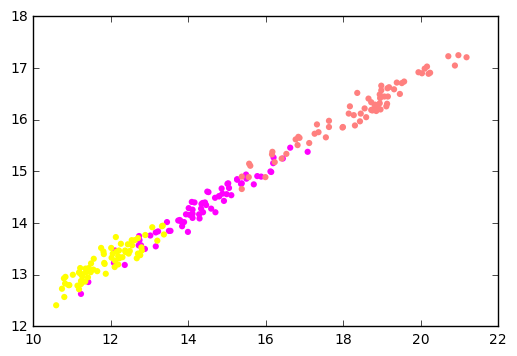

In [165]:
seeds_data = genfromtxt("Lista07Dane/seeds_dataset.txt")
print seeds_data
seeds, labels = seeds_data[:, :seeds_data.shape[1]], seeds_data[:, -1]
scatter(seeds[:, 0], seeds[:, 1], edgecolors='none', c=labels, cmap='spring')

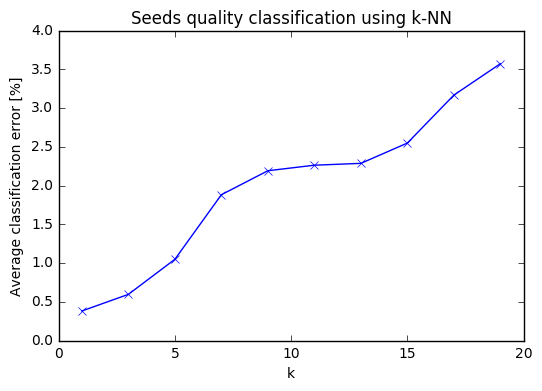

In [188]:
set_ = column_stack((seeds, labels))

errors = array([0]*10)
training_size = int(0.8*seeds.shape[0])
test_size = seeds.shape[0] - training_size
tries = 100
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    for k in range(1,20,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Seeds quality classification using k-NN')

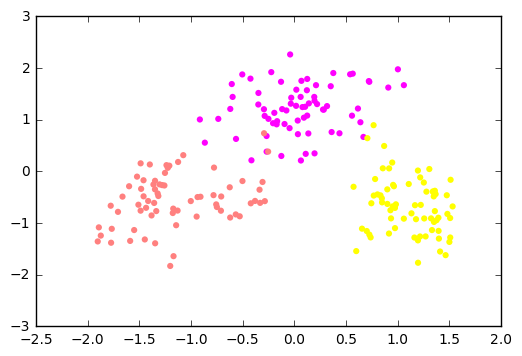

In [179]:
reduced_seeds, D, V = PCA(seeds, 2, standarize=True)
scatter(reduced_seeds[:, 0], reduced_seeds[:, 1], edgecolors='none', c=labels, cmap='spring')

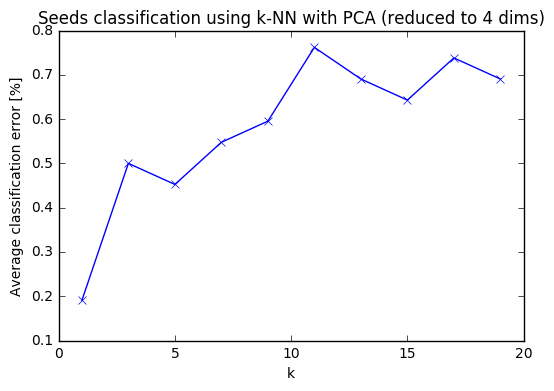

In [191]:
set_ = column_stack((seeds, labels))
dims = 4

errors = array([0]*10)
training_size = int(0.8*seeds.shape[0])
test_size = seeds.shape[0] - training_size
tries = 100
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    training_labels, test_labels = training_set[:, -1], test_set[:, -1]
    reduced_training_set, D, V = PCA(training_set[:, :-1], dims, standarize=True)
    standarized_test_set = (test_set - np.mean(test_set, 0))/np.std(test_set, 0)
    reduced_test_set = (standarized_test_set[:, :-1].dot(V)/sqrt(D))[:, :dims]
    for k in range(1,20,2):
        for (test_data, test_label) in zip(reduced_test_set, test_labels):
            label = kNN(k, test_data, reduced_training_set, training_labels)
            if label != test_label:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,20,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Seeds classification using k-NN with PCA (reduced to {} dims)'.format(dims))

### Wine quality

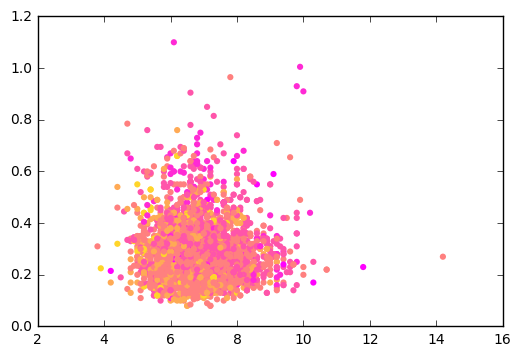

In [208]:
winequality = genfromtxt("Lista07Dane/winequality-white.csv", delimiter=';')[1:]
wineq, labels = winequality[:, :winequality.shape[1]], winequality[:, -1]
scatter(wineq[:, 0], wineq[:, 1], edgecolors='none', c=labels, cmap='spring')

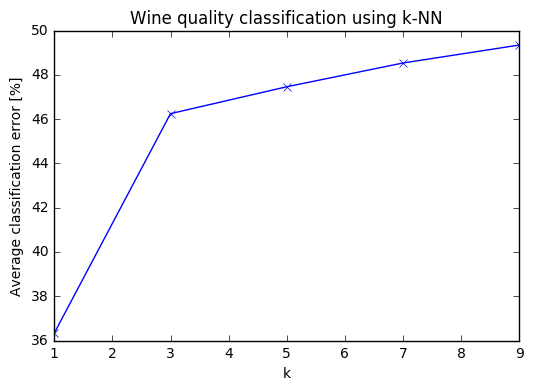

In [158]:
set_ = column_stack((wineq, labels))

errors = array([0]*5)
training_size = int(0.8*wineq.shape[0])
test_size = wineq.shape[0] - training_size
tries = 50
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    for k in range(1,10,2):
        for test_data in test_set:
            label = kNN(k, test_data[:-1], training_set[:, :-1], training_set[:, -1])
            if label != test_data[-1]:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,10,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Wine quality classification using k-NN')

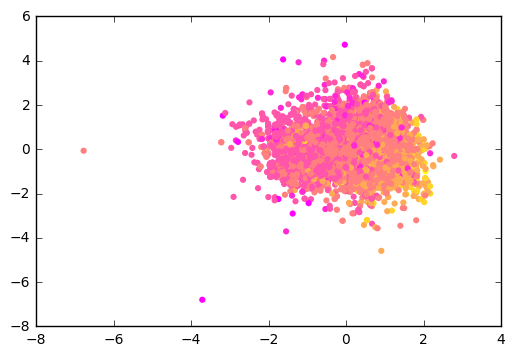

In [209]:
reduced_wineq, D, V = PCA(wineq, 5, standarize=True)
scatter(reduced_wineq[:, 0], reduced_wineq[:, 1], edgecolors='none', c=labels, cmap='spring')

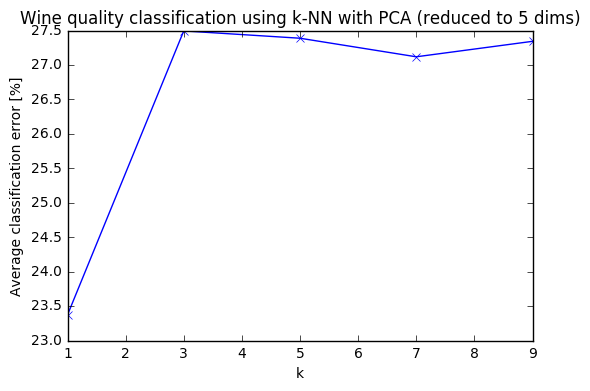

In [210]:
set_ = column_stack((wineq, labels))
dims = 5

errors = array([0]*5)
training_size = int(0.8*wineq.shape[0])
test_size = wineq.shape[0] - training_size
tries = 50
for i in range(tries):
    random.shuffle(set_)
    training_set, test_set = set_[:training_size], set_[training_size:]
    training_labels, test_labels = training_set[:, -1], test_set[:, -1]
    reduced_training_set, D, V = PCA(training_set[:, :-1], dims, standarize=True)
    standarized_test_set = (test_set - np.mean(test_set, 0))/np.std(test_set, 0)
    reduced_test_set = (standarized_test_set[:, :-1].dot(V)/sqrt(D))[:, :dims]
    for k in range(1,10,2):
        for (test_data, test_label) in zip(reduced_test_set, test_labels):
            label = kNN(k, test_data, reduced_training_set, training_labels)
            if label != test_label:
                errors[k/2] += 1
errors_percentages = errors*100.0/(test_size*tries)

plot(range(1,10,2), errors_percentages, marker='x')
xlabel('k')
ylabel('Average classification error [%]')
title('Wine quality classification using k-NN with PCA (reduced to {} dims)'.format(dims))